Доступные символы: ['(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 't', 'x', 'y', ',', '+', '-', '*']
Генерируем: *7ty
Генерируем: )01+
Генерируем: 123*


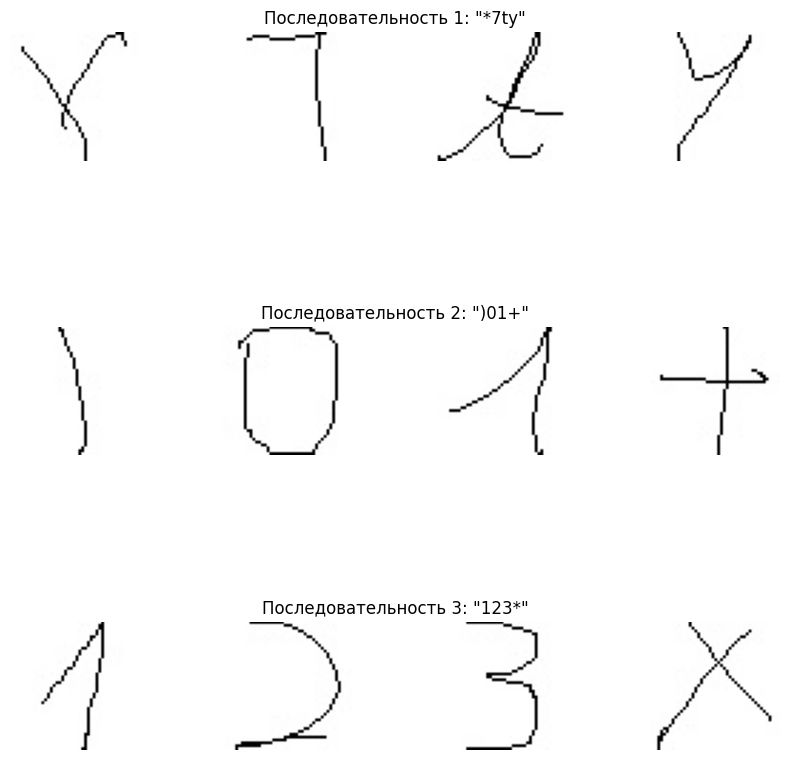

Обрабатываем последовательность 1: '*7ty'


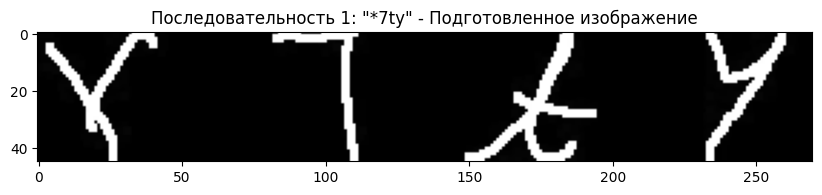

Размер thresh: (45, 270, 3)


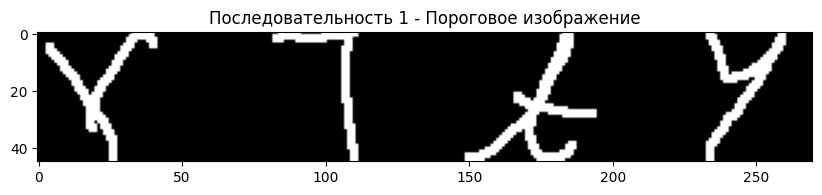

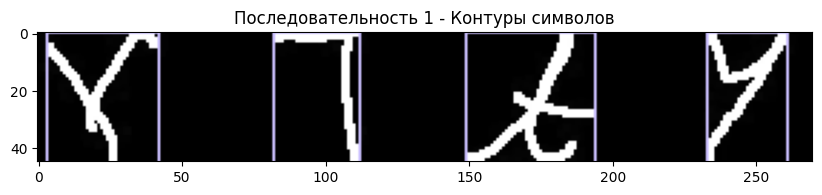

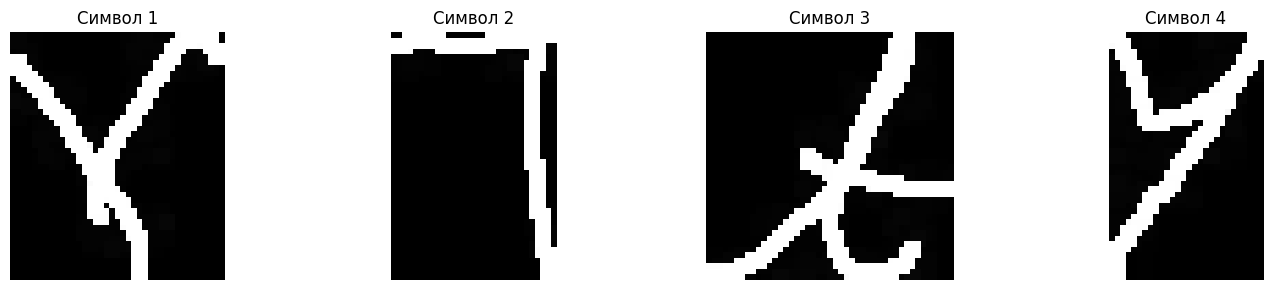


=== Текущее состояние all_data_img (после последовательности 1) ===
Последовательность 1: '*7ty', символов: 4
  Символ 1: x=3, размер=(45, 39)
  Символ 2: x=82, размер=(45, 30)
  Символ 3: x=149, размер=(45, 45)
  Символ 4: x=233, размер=(45, 28)
Обработка последовательности 1 завершена. Найдено символов: 4

Обрабатываем последовательность 2: ')01+'


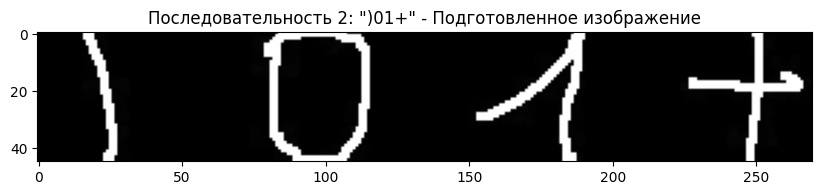

Размер thresh: (45, 270, 3)


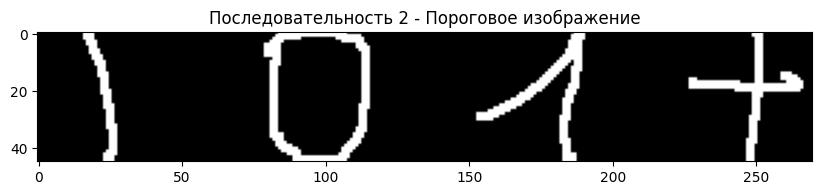

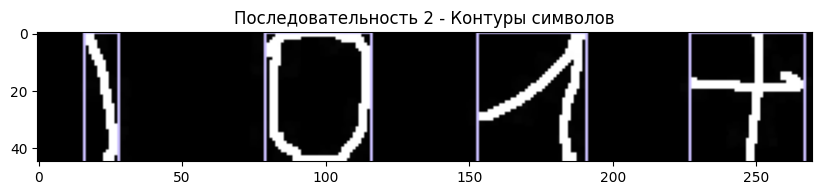

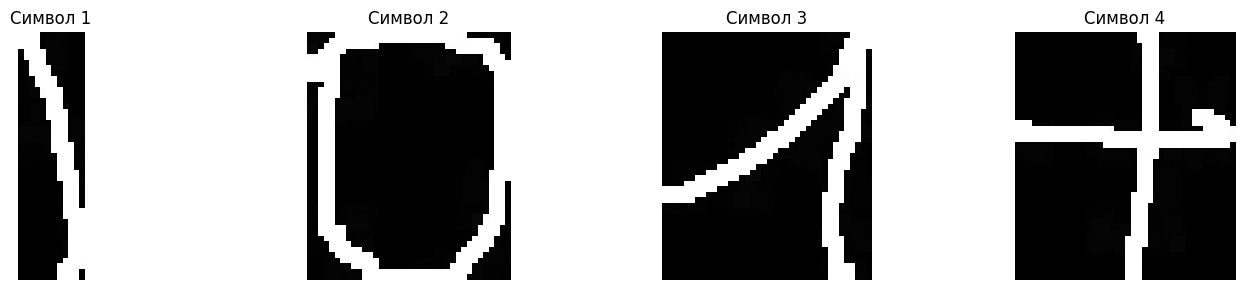


=== Текущее состояние all_data_img (после последовательности 2) ===
Последовательность 1: '*7ty', символов: 4
  Символ 1: x=3, размер=(45, 39)
  Символ 2: x=82, размер=(45, 30)
  Символ 3: x=149, размер=(45, 45)
  Символ 4: x=233, размер=(45, 28)
Последовательность 2: ')01+', символов: 4
  Символ 1: x=16, размер=(45, 12)
  Символ 2: x=79, размер=(45, 37)
  Символ 3: x=153, размер=(45, 38)
  Символ 4: x=227, размер=(45, 40)
Обработка последовательности 2 завершена. Найдено символов: 4

Обрабатываем последовательность 3: '123*'


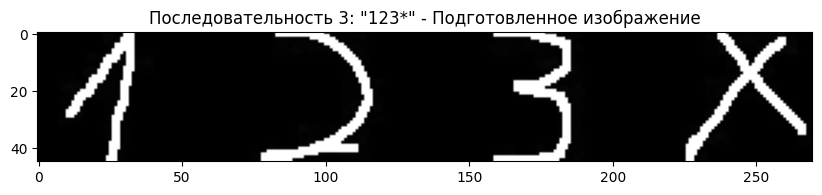

Размер thresh: (45, 270, 3)


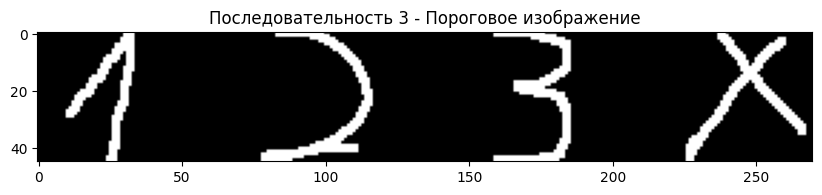

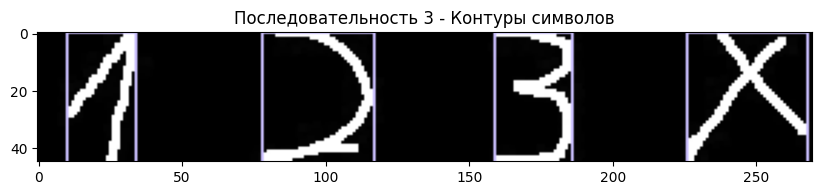

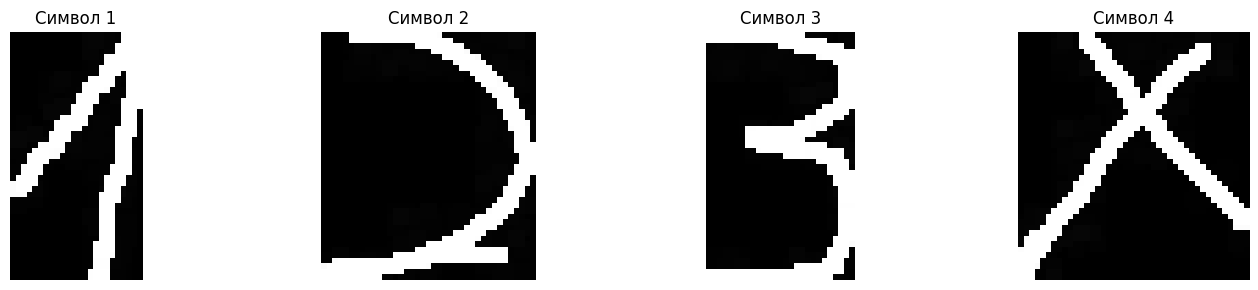


=== Текущее состояние all_data_img (после последовательности 3) ===
Последовательность 1: '*7ty', символов: 4
  Символ 1: x=3, размер=(45, 39)
  Символ 2: x=82, размер=(45, 30)
  Символ 3: x=149, размер=(45, 45)
  Символ 4: x=233, размер=(45, 28)
Последовательность 2: ')01+', символов: 4
  Символ 1: x=16, размер=(45, 12)
  Символ 2: x=79, размер=(45, 37)
  Символ 3: x=153, размер=(45, 38)
  Символ 4: x=227, размер=(45, 40)
Последовательность 3: '123*', символов: 4
  Символ 1: x=10, размер=(45, 24)
  Символ 2: x=78, размер=(45, 39)
  Символ 3: x=159, размер=(45, 27)
  Символ 4: x=226, размер=(45, 42)
Обработка последовательности 3 завершена. Найдено символов: 4


ВСЕ ОБРАБОТАННЫЕ ПОСЛЕДОВАТЕЛЬНОСТИ:
1. '*7ty' - 4 символов
2. ')01+' - 4 символов
3. '123*' - 4 символов
Обучающая выборка: 180225 изображений
Модель с k=1 успешно обучена!
Модель с k=3 успешно обучена!
Модель с k=5 успешно обучена!
Модель с k=7 успешно обучена!

СРАВНЕНИЕ РЕЗУЛЬТАТОВ ДЛЯ РАЗНЫХ K

РЕЗУЛЬТАТЫ ДЛЯ K=1:
-------

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# TASK 1 Генерация изображения с последовательностью символов 


class SymbolGenerator:
    def __init__(self, data_path):
        self.data_path = data_path
        self.symbol_to_folder = {
            '(': '(', 
            ')': ')',
            '0': '0', '1': '1', '2': '2', '3': '3', '4': '4', 
            '5': '5', '6': '6', '7': '7', '8': '8', '9': '9',
            't': 't',
            'x': 'X', 
            'y': 'y', 
            ',': ',',
            '+': '+',
            '-': '-',
            '*': '*'
        }
        self.available_symbols = list(self.symbol_to_folder.keys())
        print("Доступные символы:", self.available_symbols)
        
    def get_random_symbol_image(self, char):
        folder_name = self.symbol_to_folder[char]
        symbol_dir = os.path.join(self.data_path, folder_name)
        
        images = [f for f in os.listdir(symbol_dir)]
        images.sort() 
        start_index = int(len(images) * 0.8)
        last_20_percent = images[start_index:]

        random_image = random.choice(last_20_percent)
        img_path = os.path.join(symbol_dir, random_image)
        
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)    
        return img
    
    def generate_sequence(self, length=4):
        sequence = ''.join(random.choices(self.available_symbols, k=length))
        print(f"Генерируем: {sequence}")
        images = []
        
        for char in sequence:
            img = self.get_random_symbol_image(char)
            if img is not None:
                images.append(img)
        
        return sequence, images

generator = SymbolGenerator('./data')


def create_sequence_image(images, spacing=20): #Склейка
    total_width = sum(img.shape[1] for img in images) + spacing * (len(images) - 1)
    max_height = max(img.shape[0] for img in images)
    
    sequence_img = np.ones((max_height, total_width), dtype=np.uint8) * 255
    
    x_offset = 0
    for img in images:
        h, w = img.shape
        y_offset = (max_height - h)
        sequence_img[y_offset:y_offset+h, x_offset:x_offset+w] = img
        x_offset += w + spacing
    
    return sequence_img

all_sequences = [] #Генерация
all_images = []

for i in range(3):
    sequence, images = generator.generate_sequence(length=4)
    all_sequences.append(sequence)
    all_images.append(images)  

final_images = []

for images in all_images:  
    sequence_image = create_sequence_image(images, spacing=30)
    final_images.append(sequence_image)


fig, axes = plt.subplots(3, 1, figsize=(8, 10)) #Отрисовка

for i, (img, sequence) in enumerate(zip(final_images, all_sequences)):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Последовательность {i+1}: "{sequence}"')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

def center_in(image, target_size=45):
    h, w = image.shape
    
    squared = np.zeros((target_size, target_size), dtype=np.uint8)
    
    y_offset = (target_size - h) // 2
    x_offset = (target_size - w) // 2
    
    squared[y_offset:y_offset+h, x_offset:x_offset+w] = image
    return squared

# Создаем новый массив с изображениями 45x45
all_data_img = []

for seq_data in all_data_img:
    sequence_text = seq_data['sequence_text']
    symbols_data = seq_data['symbols']
    
    # СОРТИРУЕМ символы по координате X перед обработкой
    symbols_sorted = sorted(symbols_data, key=lambda item: item[0])
    
    resized_symbols = []
    for x, symbol_img in symbols_sorted:  # ← Перебираем в ОТСОРТИРОВАННОМ порядке
        original_size = symbol_img.shape
        resized_img = center_in(symbol_img)
        resized_symbols.append((x, resized_img))
        
        print(f"Ресайз: {original_size} → {resized_img.shape}")
    
    all_data_img.append({
        'sequence_text': sequence_text,
        'symbols': resized_symbols  # ← Теперь в правильном порядке
    })


# Визуализируем преобразование
if all_data_img:
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    for i in range(min(3, len(all_data_img[0]['symbols']))):
        orig_img = all_data_img[0]['symbols'][i][1]
        resized_img = all_data_img[0]['symbols'][i][1]
        
        axes[0, i].imshow(orig_img, cmap='gray')
        axes[0, i].set_title(f'Оригинал: {orig_img.shape}')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(resized_img, cmap='gray')
        axes[1, i].set_title(f'Ресайз: {resized_img.shape}')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()
all_data_img = []

for img_index, img in enumerate(final_images):
    print(f"Обрабатываем последовательность {img_index + 1}: '{all_sequences[img_index]}'")
    
    img_gray = img
    kernel = np.ones((3,3),np.uint8)
    img_gray = cv2.erode(img_gray,kernel,iterations = 1)
    img_gray = cv2.bitwise_not(img_gray)
    base_size=img_gray.shape[0],img_gray.shape[1]
    base=np.zeros(base_size,dtype=np.uint8)
    base[0:img_gray.shape[0],0:img_gray.shape[1]]=img_gray
    base = cv2.cvtColor(base, cv2.COLOR_GRAY2RGB)

    img_rgb = base

    plt.figure(figsize=(10, 3))
    plt.imshow(img_rgb)
    plt.title(f'Последовательность {img_index + 1}: "{all_sequences[img_index]}" - Подготовленное изображение')
    plt.show()
    
    ret,thresh = cv2.threshold(img_rgb,127,255,0)
    print(f"Размер thresh: {thresh.shape}")
    
    plt.figure(figsize=(10, 3))
    thresh = np.uint8(thresh)
    plt.imshow(thresh)
    plt.title(f'Последовательность {img_index + 1} - Пороговое изображение')
    plt.show()
    
    contours, h = cv2.findContours(thresh[:,:,0], cv2.RETR_EXTERNAL, 2)
    crops = []

    # СОРТИРУЕМ контуры слева направо
    contours_sorted = sorted(contours, key=lambda cnt: cv2.boundingRect(cnt)[0])

    for i in range(len(contours_sorted)):
        cnt = contours_sorted[i]  # берем из ОТСОРТИРОВАННОГО списка
        area = cv2.contourArea(cnt)
        x,y,w,h = cv2.boundingRect(cnt)
        while (w>45):
            w-=1
        
        if w*h > 50:
            cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(203,192,255),1)
            crops.append([x,y,w,h]) 
    
    plt.figure(figsize=(10, 3))
    plt.imshow(img_rgb)
    plt.title(f'Последовательность {img_index + 1} - Контуры символов')
    plt.show()
    
    sequence_symbols = []
    # Группируем все символы для отображения
    fig, axes = plt.subplots(1, len(crops), figsize=(15, 3))
    if len(crops) == 1:
        axes = [axes]
    
    for i in range(len(crops)):
        x,y,w,h = crops[i]        
        img_crop = img_gray[y:y+h, x:x+w]
        base = img_crop.copy()

        axes[i].imshow(base, cmap="gray")
        axes[i].set_title(f'Символ {i+1}')
        axes[i].axis('off')
        sequence_symbols.append((x, base))
    
    plt.tight_layout()
    plt.show()
    
    all_data_img.append({
        'sequence_text': all_sequences[img_index],
        'symbols': sequence_symbols
    })
    
    print(f"\n=== Текущее состояние all_data_img (после последовательности {img_index + 1}) ===")
    for i, seq_data in enumerate(all_data_img):
        print(f"Последовательность {i+1}: '{seq_data['sequence_text']}', символов: {len(seq_data['symbols'])}")
        for j, (x, symbol_img) in enumerate(seq_data['symbols']):
            print(f"  Символ {j+1}: x={x}, размер={symbol_img.shape}")
    print("=" * 80)
    
    print(f"Обработка последовательности {img_index + 1} завершена. Найдено символов: {len(sequence_symbols)}\n")

print("\nВСЕ ОБРАБОТАННЫЕ ПОСЛЕДОВАТЕЛЬНОСТИ:")
for i, seq_data in enumerate(all_data_img):
    print(f"{i+1}. '{seq_data['sequence_text']}' - {len(seq_data['symbols'])} символов")

from sklearn.neighbors import KNeighborsClassifier
def load_training_data(data_path, symbols, train_size=0.8):
    X_train, y_train = [], []
    
    for symbol in symbols:
        symbol_path = os.path.join(data_path, symbol)
        images = [f for f in os.listdir(symbol_path) if os.path.isfile(os.path.join(symbol_path, f))]
        images.sort()
        
        split_idx = int(len(images) * train_size)
        train_images = images[:split_idx]
        
        for img_name in train_images:
            img_path = os.path.join(symbol_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                X_train.append(img.flatten())
                y_train.append(symbol)
    
    return np.array(X_train), np.array(y_train)


symbols = ['0','1','2','3','4','5','6','7','8','9','+','-','*','t','X','y','w','h','(',')',',']

X_train, y_train = load_training_data('./data', symbols)
print(f"Обучающая выборка: {len(X_train)} изображений")

# ИЗМЕНЕНИЕ: Создаем несколько моделей с разными k
k_values = [1, 3, 5, 7]
models = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    models[k] = knn
    print(f"Модель с k={k} успешно обучена!")

def predict_symbol(model, image):
    # Привести к стандартному размеру 45x45
    target_size = (45, 45)
    image_resized = cv2.resize(image, target_size)
    
    # Нормализация и инверсия
    image_processed = cv2.bitwise_not(image_resized)
    img_flat = image_processed.flatten()
    
    # Проверка размера (должно быть 2025)
    expected_size = model.n_features_in_
    if len(img_flat) != expected_size:
        print(f"ВНИМАНИЕ: Размер не совпадает! Ожидалось {expected_size}, получено {len(img_flat)}")
    
    prediction = model.predict([img_flat])
    return prediction[0]

#Сравниваем результаты для разных k
print("\n" + "=" * 80)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ ДЛЯ РАЗНЫХ K")
print("=" * 80)

results = {}

for k, model in models.items():
    print(f"\nРЕЗУЛЬТАТЫ ДЛЯ K={k}:")
    print("-" * 40)
    
    total_correct = 0
    total_symbols = 0
    sequence_results = []
    
    for i, seq_data in enumerate(all_data_img):
        original_text = seq_data['sequence_text']
        symbols_data = seq_data['symbols']
        
        print(f"\nПоследовательность {i+1}:")
        print(f"Оригинал: '{original_text}'")
        
        predicted_symbols = []
        for j, (x, symbol_img) in enumerate(symbols_data):
            symbol_img_resized = cv2.resize(symbol_img, (45, 45))
            predicted_char = predict_symbol(model, symbol_img_resized)
            predicted_symbols.append(predicted_char)
        
        predicted_text = ''.join(predicted_symbols)
        print(f"Предсказано: '{predicted_text}'")
        
        correct_symbols = sum(1 for orig, pred in zip(original_text, predicted_text) if orig == pred)
        sequence_accuracy = correct_symbols / len(original_text)
        total_correct += correct_symbols
        total_symbols += len(original_text)
        
        if original_text == predicted_text:
            print("✓ Результат точный")
            sequence_results.append(1.0)
        else:
            print("✗ Результат не точный, есть ошибки")
            sequence_results.append(0.0)
            
            for idx, (orig_char, pred_char) in enumerate(zip(original_text, predicted_text)):
                if orig_char != pred_char:
                    print(f"   Ошибка в позиции {idx+1}: ожидалось '{orig_char}', получено '{pred_char}'")
    
    overall_accuracy = total_correct / total_symbols if total_symbols > 0 else 0
    results[k] = {
        'overall_accuracy': overall_accuracy,
        'sequence_accuracy': np.mean(sequence_results),
        'total_correct': total_correct,
        'total_symbols': total_symbols
    }
    
    print(f"\nИтог для k={k}:")
    print(f"  Правильно распознано символов: {total_correct}/{total_symbols}")
    print(f"  Точность распознавания символов: {overall_accuracy:.2%}")
    print(f"  Полностью правильных последовательностей: {sum(sequence_results)}/{len(sequence_results)}")

#Анализ и выбор лучшего k
print("\n" + "=" * 80)
print("АНАЛИЗ РЕЗУЛЬТАТОВ И ВЫБОР ЛУЧШЕГО K")
print("=" * 80)

best_k = None
best_accuracy = 0

for k, result in results.items():
    accuracy = result['overall_accuracy']
    print(f"K={k}: Точность {accuracy:.2%} ({result['total_correct']}/{result['total_symbols']} символов)")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nВЫВОД: Лучший результат показал K={best_k} с точностью {best_accuracy:.2%}")
print(f"\nРЕКОМЕНДАЦИЯ: Для данной задачи оптимальным является K={best_k}")